
Restricción 1:

Restricción 2:

Restricción 3:

Restricción 4:


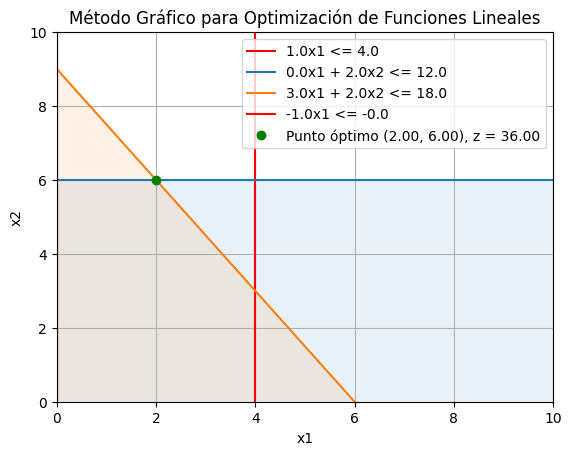

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Solicitar los coeficientes de la función objetivo al usuario
c1 = float(input("Ingrese el coeficiente de x1 en la función objetivo: "))
c2 = float(input("Ingrese el coeficiente de x2 en la función objetivo: "))
c = np.array([-c1, -c2])  # Convertimos a minimización usando -c1 y -c2

# Solicitar el número de restricciones
num_restricciones = int(input("Ingrese el número de restricciones: "))

# Listas para guardar las restricciones
A = []
b = []

# Coeficientes de cada restricción
for i in range(num_restricciones):
    print(f"\nRestricción {i + 1}:")
    a1 = float(input("Ingrese el coeficiente de x1: "))
    a2 = float(input("Ingrese el coeficiente de x2: "))
    tipo = input("Ingrese el tipo de restricción (<= o >=): ")
    limite = float(input("Ingrese el valor del límite: "))

    # Convertir restricciones >= a <= multiplicando por -1
    if tipo == ">=":
        A.append([-a1, -a2])
        b.append(-limite)
    else:
        A.append([a1, a2])
        b.append(limite)

# Convertir las listas a arrays de numpy
A = np.array(A)
b = np.array(b)

# Valores positivos
x1_bounds = (0, None)
x2_bounds = (0, None)

# Resolvemos el problema de PL
res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs')

# Graficar restricciones
x1 = np.linspace(0, 30, 1000)
plt.xlim(0, 10)
plt.ylim(0, 10)

for i in range(num_restricciones):
    a1, a2 = A[i]
    limite = b[i]
    if a2 != 0:
        # Graficar la restricción como una línea
        plt.plot(x1, (limite - a1 * x1) / a2, label=f'{a1}x1 + {a2}x2 <= {limite}')
        # Sombrear la región de la restricción
        plt.fill_between(x1, 0, (limite - a1 * x1) / a2, where=((limite - a1 * x1) / a2 >= 0) & (x1 >= 0), alpha=0.1)
    else:
        # Si a2 es 0, entonces es una restricción vertical de la forma x1 <= limite / a1
        plt.axvline(x=limite / a1, color='red', linestyle='-', label=f'{a1}x1 <= {limite}')

# Punto óptimo
if res.success:
    x_opt, y_opt = res.x
    z_opt = c1 * x_opt + c2 * y_opt  # Calcula el valor óptimo de la función objetivo original
    plt.plot(x_opt, y_opt, 'go', label=f'Punto óptimo ({x_opt:.2f}, {y_opt:.2f}), z = {z_opt:.2f}')
else:
    print("No se encontró una solución óptima.")

# Configuración de la gráfica
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Método Gráfico para Optimización de Funciones Lineales')
plt.show()
